# Q Learning 

In [1]:
import pandas as pd
import numpy as np 
import pylab as plt
import networkx as nx

In [2]:
edge_list = [(0,2), (0,1), (0,3),(2,4),(5,6),
            (7,4),(0,6),(5,3),(3,7),(0,8)]

In [3]:
goal = 2

In [4]:
G = nx.Graph()
G.add_edges_from(edge_list)
position = nx.spring_layout(G)

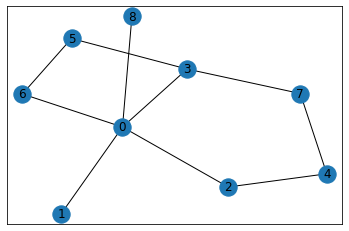

In [5]:
nx.draw_networkx_nodes(G, position)
nx.draw_networkx_edges(G, position)
nx.draw_networkx_labels(G, position)
plt.show()

In [6]:
size_matrix =9

In [7]:
R = np.matrix(np.ones(shape=(size_matrix, size_matrix)))
R *=-1
R

matrix([[-1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1.]])

In [26]:
for edge in edge_list:
    print(edge)
    if edge[1]==goal:
        R[edge]=100
    else:
        R[edge]=0
    if edge[0]==goal:
        R[edge[::-1]]=100
    else:
        R[edge[::-1]]=0

(0, 2)
(0, 1)
(0, 3)
(2, 4)
(5, 6)
(7, 4)
(0, 6)
(5, 3)
(3, 7)
(0, 8)


In [27]:
R[goal, goal]=100

In [28]:
R

matrix([[ -1.,   0., 100.,   0.,  -1.,  -1.,   0.,  -1.,   0.],
        [  0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1., 100.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,   0.,  -1.],
        [ -1.,  -1., 100.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.],
        [ -1.,  -1.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [  0.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,   0.,   0.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.]])

In [29]:
gamma=0.8

In [30]:
Q = np.matrix(np.zeros([size_matrix, size_matrix]))
pd.DataFrame(Q)

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
def get_available_action(state):
    current_state_row = R[state]
    available_actions = np.where(current_state_row>=0)[1]
    return available_actions

In [32]:
def sample_next_action(available_actions):
    next_action = int(np.random.choice(available_actions, size=1))
    return next_action
                      

In [33]:
def update(current_state, action, gamma):
    max_index = np.where(Q[action, ]==np.max(Q[action, ]))[1]
    print('max_index', max_index.shape)
    if max_index.shape[0]>1:
        max_index = int(np.random.choice(max_index, size=1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]
    Q[current_state, action] = R[current_state, action] + gamma*max_value
    print('max_value', R[current_state, action] + gamma*max_value)
    
    

In [34]:
initial_state = 5

In [35]:
available_actions = get_available_action(initial_state)
available_actions

array([3, 6], dtype=int64)

In [36]:
action = sample_next_action(available_actions)
action

3

In [37]:
update(initial_state, action, gamma)

max_index (9,)
max_value 0.0


In [39]:
for i in range(1000):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_actions = get_available_action(current_state)
    action = sample_next_action(available_actions)
    update(current_state, action, gamma)

max_index (7,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (7,)
max_value 100.0
max_index (7,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (7,)
max_value 0.0
max_index (1,)
max_value 80.0
max_index (7,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (1,)
max_value 164.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (1,)
max_value 131.20000000000002
max_index (7,)
max_value 0.0
max_index (7,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (7,)
max_value 0.0
max_index (7,)
max_value 0.0
max_index (1,)
max_value 131.20000000000002
max_index (1,)
max_value 164.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (7,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (1,)
max_value 231.20000000000002
max_index (1,)
max_value 104.96000000000002
max_i

max_index (1,)
max_value 267.1450587136
max_index (1,)
max_value 333.931323392
max_index (2,)
max_value 213.71604697088003
max_index (1,)
max_value 267.1450587136
max_index (1,)
max_value 333.931323392
max_index (1,)
max_value 333.931323392
max_index (1,)
max_value 333.931323392
max_index (1,)
max_value 478.3506160490906
max_index (1,)
max_value 333.931323392
max_index (1,)
max_value 333.931323392
max_index (2,)
max_value 213.71604697088003
max_index (1,)
max_value 267.1450587136
max_index (1,)
max_value 478.3506160490906
max_index (1,)
max_value 333.931323392
max_index (1,)
max_value 267.1450587136
max_index (1,)
max_value 267.1450587136
max_index (2,)
max_value 213.71604697088003
max_index (1,)
max_value 333.931323392
max_index (1,)
max_value 478.3506160490906
max_index (1,)
max_value 267.1450587136
max_index (1,)
max_value 478.3506160490906
max_index (1,)
max_value 267.1450587136
max_index (1,)
max_value 382.6804928392725
max_index (1,)
max_value 382.6804928392725
max_index (1,)
max

max_index (1,)
max_value 317.09426887350935
max_index (1,)
max_value 498.140332079046
max_index (1,)
max_value 396.36783609188666
max_index (1,)
max_value 317.09426887350935
max_index (2,)
max_value 253.6754150988075
max_index (1,)
max_value 317.09426887350935
max_index (1,)
max_value 398.5122656632368
max_index (1,)
max_value 398.5122656632368
max_index (1,)
max_value 318.80981253058945
max_index (1,)
max_value 316.36783609188666
max_index (1,)
max_value 317.09426887350935
max_index (1,)
max_value 498.140332079046
max_index (1,)
max_value 398.5122656632368
max_index (1,)
max_value 498.140332079046
max_index (1,)
max_value 398.5122656632368
max_index (1,)
max_value 398.5122656632368
max_index (1,)
max_value 398.5122656632368
max_index (1,)
max_value 317.09426887350935
max_index (2,)
max_value 253.6754150988075
max_index (1,)
max_value 398.5122656632368
max_index (1,)
max_value 398.5122656632368
max_index (1,)
max_value 498.140332079046
max_index (2,)
max_value 253.6754150988075
max_ind

max_index (1,)
max_value 319.9581240012209
max_index (1,)
max_value 499.9476550015261
max_index (1,)
max_value 399.9476550015261
max_index (1,)
max_value 255.96649920097673
max_index (1,)
max_value 399.9476550015261
max_index (1,)
max_value 399.9476550015261
max_index (1,)
max_value 399.9476550015261
max_index (1,)
max_value 319.9581240012209
max_index (1,)
max_value 399.9476550015261
max_index (1,)
max_value 319.9581240012209
max_index (1,)
max_value 399.9476550015261
max_index (1,)
max_value 399.9476550015261
max_index (1,)
max_value 319.9581240012209
max_index (1,)
max_value 319.9581240012209
max_index (1,)
max_value 399.9476550015261
max_index (1,)
max_value 255.96649920097673
max_index (1,)
max_value 255.96649920097673
max_index (1,)
max_value 399.9476550015261
max_index (1,)
max_value 255.96649920097673
max_index (1,)
max_value 399.9476550015261
max_index (1,)
max_value 319.9581240012209
max_index (1,)
max_value 319.9581240012209
max_index (1,)
max_value 319.9581240012209
max_ind

In [40]:
pd.DataFrame(Q)

,0,1,2,3,4,5,6,7,8
0,0.000000,319.978559,499.966499,319.978559,0.000000,0.000000,319.978559,0.000000,319.978559
1,399.973199,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
2,399.973199,0.000000,499.978559,-1.000000,399.982848,0.000000,-1.000000,0.000000,0.000000
3,399.973199,0.000000,0.000000,-1.000000,0.000000,255.982848,-1.000000,319.986278,0.000000
4,0.000000,0.000000,499.978559,-1.000000,0.000000,0.000000,-1.000000,319.958124,0.000000
5,0.000000,0.000000,0.000000,319.978559,0.000000,0.000000,319.978559,0.000000,0.000000
6,399.973199,0.000000,0.000000,-1.000000,0.000000,255.982848,-1.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,319.978559,399.982848,0.000000,-1.000000,0.000000,0.000000
8,399.973199,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000


In [41]:
print('Normalized Q Matrix')
pd.DataFrame(Q/ np.max(Q) *100)

Normalized Q Matrix


,0,1,2,3,4,5,6,7,8
0,0.00000,63.998456,99.997588,63.998456,0.0,0.000000,63.998456,0.000000,63.998456
1,79.99807,0.000000,0.000000,-0.200009,0.0,0.000000,-0.200009,0.000000,0.000000
2,79.99807,0.000000,100.000000,-0.200009,80.0,0.000000,-0.200009,0.000000,0.000000
3,79.99807,0.000000,0.000000,-0.200009,0.0,51.198765,-0.200009,64.000000,0.000000
4,0.00000,0.000000,100.000000,-0.200009,0.0,0.000000,-0.200009,63.994369,0.000000
5,0.00000,0.000000,0.000000,63.998456,0.0,0.000000,63.998456,0.000000,0.000000
6,79.99807,0.000000,0.000000,-0.200009,0.0,51.198765,-0.200009,0.000000,0.000000
7,0.00000,0.000000,0.000000,63.998456,80.0,0.000000,-0.200009,0.000000,0.000000
8,79.99807,0.000000,0.000000,-0.200009,0.0,0.000000,-0.200009,0.000000,0.000000


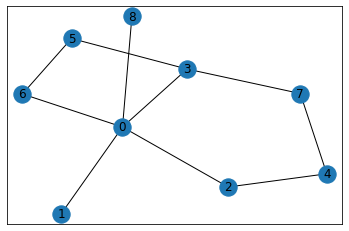

In [42]:
nx.draw_networkx_nodes(G, position)
nx.draw_networkx_edges(G, position)
nx.draw_networkx_labels(G, position)
plt.show()

In [44]:
current_state = 5
steps = [current_state]

while current_state !=goal:
#     print(current_state)
    max_index = np.where(Q[current_state, ]==np.max(Q[current_state, ]))[1]
    if max_index.shape[0]>1:
        max_index = int(np.random.choice(max_index, size=1))
    else:
        max_index = int(max_index)
#     print(max_index)
    steps.append(max_index)
    current_state = max_index

print(steps)

[5, 3, 0, 2]
